### import libraries and collect data
this project consistent of some basic exploratory data analysis using a customer shopping trend dataset from kaggle

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle
import zipfile

In [2]:
#get customer datset from kaggle
!kaggle datasets download -d iamsouravbanerjee/customer-shopping-trends-dataset

  0%|                                                | 0.00/146k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 146k/146k [00:00<00:00, 6.65MB/s]


In [3]:
# extract the file from the downloaded zip file
zipfile_name = 'customer-shopping-trends-dataset.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [8]:
#Load dataset from CSV file
df = pd.read_csv("shopping_trends_updated.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [9]:
df.shape

(3900, 18)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [12]:
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [13]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [14]:
df['Gender'].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [30]:
df.groupby('Category')['Purchase Amount (USD)'].mean()

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

In [33]:
df.corr(numeric_only=True)

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Customer ID,1.000000,-0.004079,0.011048,0.001343,-0.039159
Age,-0.004079,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),0.011048,-0.010424,1.000000,0.030776,0.008063
Review Rating,0.001343,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,-0.039159,0.040445,0.008063,0.004229,1.000000


<Axes: >

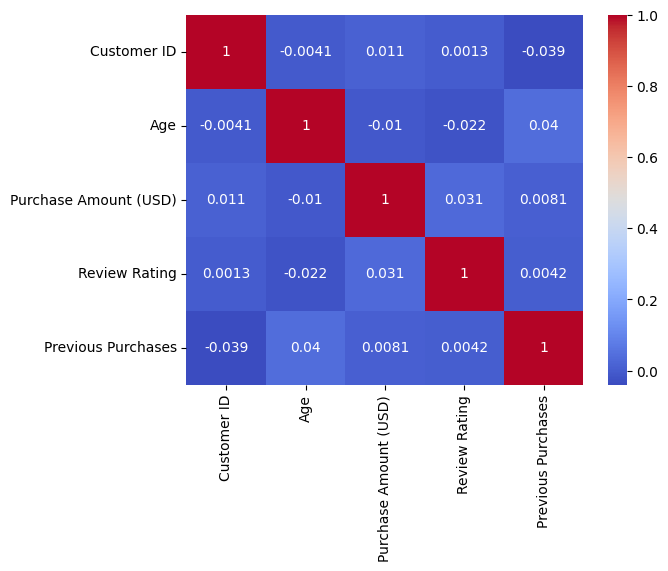

In [36]:
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm', annot=True)

In [37]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [39]:
df2 = df[['Gender','Purchase Amount (USD)','Category','Season','Age','Review Rating']]
df2.head()

,Gender,Purchase Amount (USD),Category,Season,Age,Review Rating
0,Male,53,Clothing,Winter,55,3.1
1,Male,64,Clothing,Winter,19,3.1
2,Male,73,Clothing,Spring,50,3.1
3,Male,90,Footwear,Spring,21,3.5
4,Male,49,Clothing,Spring,45,2.7


Text(0, 0.5, 'Count of Sales')

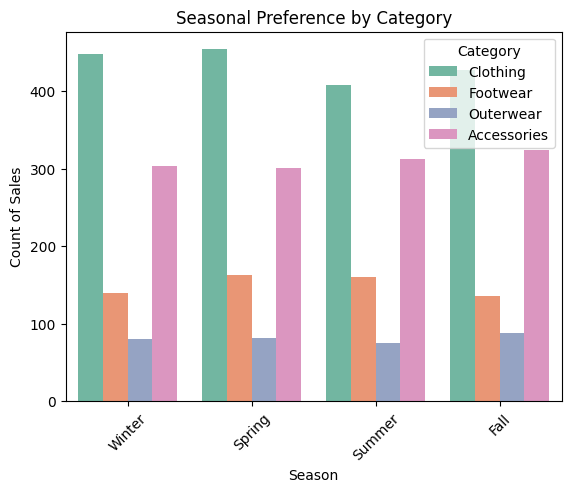

In [44]:
sns.countplot(x='Season',data = df2, hue = 'Category', palette='Set2')
plt.title('Seasonal Preference by Category')
plt.xticks(rotation=45)
plt.ylabel('Count of Sales')

([0, 1, 2, 3],
 [Text(0, 0, 'Clothing'),
  Text(1, 0, 'Footwear'),
  Text(2, 0, 'Outerwear'),
  Text(3, 0, 'Accessories')])

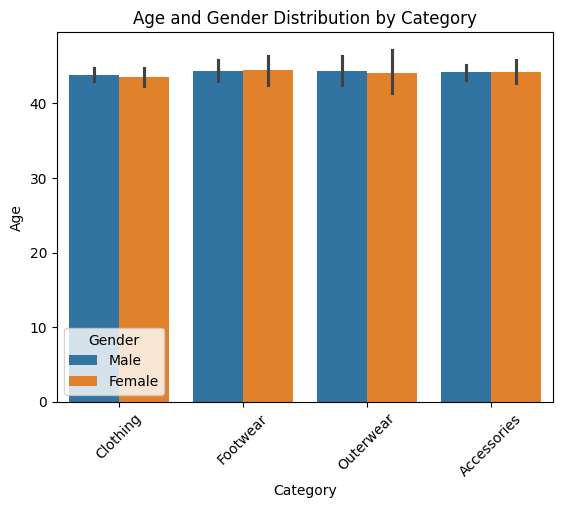

In [45]:
sns.barplot(x='Category', y='Age', data = df2, hue = 'Gender')
plt.title('Age and Gender Distribution by Category')
plt.xticks(rotation=45)


Text(0.5, 0, 'Count')

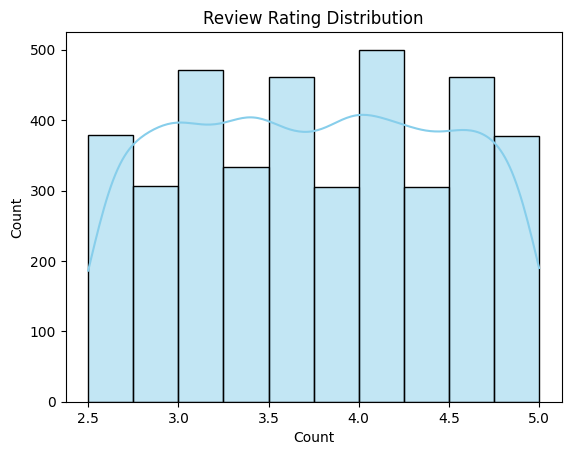

In [46]:
sns.histplot(x=df['Review Rating'], bins=10, kde=True, data = df2, color='skyblue')
plt.title('Review Rating Distribution')
plt.xlabel('Review Rating')
plt.xlabel('Count')
